In [8]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# single stick sticking down

In [46]:
def run2taskL(taskL,nitr=50):
  ntasks = len(taskL)
  rt = np.zeros([nitr,4,ntasks])
  smode = np.zeros([nitr,4,ntasks])
  sol_L = []
  for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
    sol_L.append([])
    for itr in range(nitr):
      D = treeSearch(taskL,BFS=bfs,memory=mem)
      rt[itr,idx],smode[itr,idx] = D['rt'],D['smode']
      sol_L[idx].append([i.valid_actions for i in D['solution_nodes']])
  return rt,smode,np.array(sol_L)
idxL = ['BFS','DFS','BFSm','DFSm']

In [47]:
def line_plt_rt(ax,rt):
  for mi in range(len(idxL)):
    M = rt.mean(0)[mi]
    S = rt.std(0)[mi]/np.sqrt(len(rt))
    ax.plot(M,label=idxL[mi])
    ax.fill_between(range(len(M)),M-S,M+S,alpha=0.4)
  ax.legend()

In [48]:
taskL = []
taskL += [generate_board(tactic_name='bias_join',n_extra_sticks=1,contiguous=True) for i in range(2)]
taskL += [generate_board(tactic_name='bias_loose',n_extra_sticks=1,contiguous=True) for i in range(2)]
taskL += [generate_board(tactic_name='bias_final',n_extra_sticks=1,contiguous=True) for i in range(2)]

# f,axar = plt.subplots(4,1,figsize=(8,20))
rt,smode,sol_L = run2taskL(taskL,nitr)
# line_plt_rt(ax,rt)

<ipython-input-46-ab6e1d696832>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return rt,smode,np.array(sol_L)


In [51]:
sol_L.shape

(4, 2, 6)

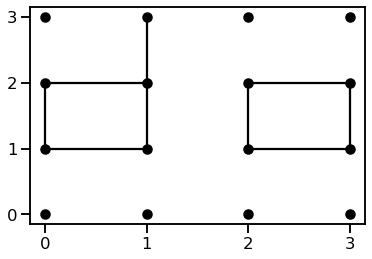

In [5]:
from utils import *
plt.subplots(1,3,figsize=(10,15))
draw_board(LOOSE_END_BOARD_BIAS)

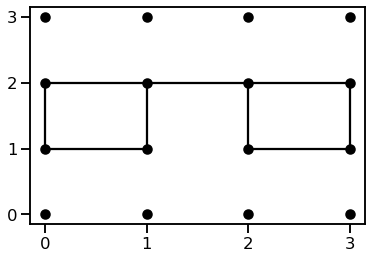

In [6]:
draw_board(JOIN_BOARD_BIAS)